In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

# isme ek idea hum woh bhi kar skte hai jisse farmer apna details daal de aur add karde crops se related details and contact kar le

# isse yeh ho jayega usko bhaut zyada price mil jayega aur jo fruits beek na rhe ho ya jaldi use karne ho woh bhaut jaldi sell out kar ske

In [2]:
df1=pd.read_csv("agridata.csv")

In [3]:
df1.head()

,state_name,district_name,market_name,variety,group,arrival_tonnes,min_price_rs_quintal,max_price_rs_quintal,modal_price_rs_quintal,reported_date,commodity_name
0,Gujarat,Surat,Surat,Other,Vegetables,1.50,4000,7500,5750,2022-07-13,Ambada Seed
1,Haryana,Sonipat,Ganaur,Yam (Ratalu),Vegetables,0.45,2500,3000,2800,2022-07-13,Ambada Seed
2,Telangana,Hyderabad,Erragadda(Rythu Bazar),Other,Vegetables,3.00,2300,2300,2300,2022-07-13,Ambada Seed
3,Telangana,Ranga Reddy,Mehndipatnam(Rythu Bazar),Other,Vegetables,0.40,2300,2300,2300,2022-07-13,Ambada Seed
4,Gujarat,Surat,Surat,Other,Vegetables,1.50,4000,7500,5750,2022-07-13,Wool


In [4]:
df1['district_name'].unique()

array(['Surat', 'Sonipat', 'Hyderabad', 'Ranga Reddy', 'Wayanad',
       'Idukki', 'Kollam'], dtype=object)

In [5]:
df1 = df1.drop(['market_name', 'variety', 'group'], axis=1)

In [6]:
df1['district_name'] = df1['district_name'].replace('Surat', 'Surat - Gujarat - (Western)')

In [7]:
df1['district_name'] = df1['district_name'].replace('Sonipat', 'Sonipat - Haryana - (Northern)')

In [8]:
df1['district_name'] = df1['district_name'].replace('Hyderabad', 'Hyderabad - Telangana - (Southern)')

In [9]:
df1['district_name'] = df1['district_name'].replace('Ranga Reddy', 'Ranga Reddy - Telangana - (Southern)')

In [10]:
df1['district_name'] = df1['district_name'].replace('Wayanad', 'Wayanad - Kerala - (Southern Western)')

In [11]:
df1['district_name'] = df1['district_name'].replace('Idukki', 'Idukki - Kerala - (Southern Western)')

In [12]:
df1['district_name'] = df1['district_name'].replace('Kollam', 'Kollam - Kerala - (Southern Western)')

In [13]:
df2=df1.drop(['state_name'],axis=1)

In [14]:
df2

,district_name,arrival_tonnes,min_price_rs_quintal,max_price_rs_quintal,modal_price_rs_quintal,reported_date,commodity_name
0,Surat - Gujarat - (Western),1.50,4000,7500,5750,2022-07-13,Ambada Seed
1,Sonipat - Haryana - (Northern),0.45,2500,3000,2800,2022-07-13,Ambada Seed
2,Hyderabad - Telangana - (Southern),3.00,2300,2300,2300,2022-07-13,Ambada Seed
3,Ranga Reddy - Telangana - (Southern),0.40,2300,2300,2300,2022-07-13,Ambada Seed
4,Surat - Gujarat - (Western),1.50,4000,7500,5750,2022-07-13,Wool
...,...,...,...,...,...,...,...
3435,Wayanad - Kerala - (Southern Western),13.00,2400,2500,2500,2022-07-14,Bamboo
3436,Idukki - Kerala - (Southern Western),4.90,1800,2300,2100,2022-07-14,Bamboo
3437,Kollam - Kerala - (Southern Western),0.30,5000,5500,5300,2022-07-14,Bamboo
3438,Hyderabad - Telangana - (Southern),3.00,2800,2800,2800,2022-07-14,Bamboo


In [15]:
df2= df2.loc[df2['commodity_name'].isin(['Rice','Maize','Kabuli Chana(Chickpeas-White)','Beans','Arhar Dal(Tur Dal)','Mataki'
                                         'Green Gram (Moong)(Whole)','Black Gram (Urd Beans)(Whole)','Lentil (Masur)(Whole)',
                                         'Pomegranate','Banana','Mango','Grapes','Water Melon','Karbuja(Musk Melon)',
                                         'Apple','Orange','Papaya','Coconut','Cotton','Jute','Coffee'])]

In [16]:
df2

,district_name,arrival_tonnes,min_price_rs_quintal,max_price_rs_quintal,modal_price_rs_quintal,reported_date,commodity_name
96,Surat - Gujarat - (Western),1.50,4000,7500,5750,2022-07-13,Arhar Dal(Tur Dal)
97,Sonipat - Haryana - (Northern),0.45,2500,3000,2800,2022-07-13,Arhar Dal(Tur Dal)
98,Hyderabad - Telangana - (Southern),3.00,2300,2300,2300,2022-07-13,Arhar Dal(Tur Dal)
99,Ranga Reddy - Telangana - (Southern),0.40,2300,2300,2300,2022-07-13,Arhar Dal(Tur Dal)
152,Surat - Gujarat - (Western),1.50,4000,7500,5750,2022-07-13,Papaya
...,...,...,...,...,...,...,...
3405,Wayanad - Kerala - (Southern Western),13.00,2400,2500,2500,2022-07-14,Arhar Dal(Tur Dal)
3406,Idukki - Kerala - (Southern Western),4.90,1800,2300,2100,2022-07-14,Arhar Dal(Tur Dal)
3407,Kollam - Kerala - (Southern Western),0.30,5000,5500,5300,2022-07-14,Arhar Dal(Tur Dal)
3408,Hyderabad - Telangana - (Southern),3.00,2800,2800,2800,2022-07-14,Arhar Dal(Tur Dal)


In [17]:
df2['district_name']=df2['district_name'].str.lower()

c:\users\paltu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df2['commodity_name']=df2['commodity_name'].str.lower()

c:\users\paltu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df2.columns

Index(['district_name', 'arrival_tonnes', 'min_price_rs_quintal',
       'max_price_rs_quintal', 'modal_price_rs_quintal', 'reported_date',
       'commodity_name'],
      dtype='object')

In [20]:
df3=df2.rename(columns={'district_name':'district','min_price_rs_quintal':'min_rs_quintal',
                        'max_price_rs_quintal':'max_rs_quintal',
                        'modal_price_rs_quintal':'modal_rs_quintal',
                       'commodity_name':'crop_name'})

In [21]:
df3.head()

,district,arrival_tonnes,min_rs_quintal,max_rs_quintal,modal_rs_quintal,reported_date,crop_name
96,surat - gujarat - (western),1.50,4000,7500,5750,2022-07-13,arhar dal(tur dal)
97,sonipat - haryana - (northern),0.45,2500,3000,2800,2022-07-13,arhar dal(tur dal)
98,hyderabad - telangana - (southern),3.00,2300,2300,2300,2022-07-13,arhar dal(tur dal)
99,ranga reddy - telangana - (southern),0.40,2300,2300,2300,2022-07-13,arhar dal(tur dal)
152,surat - gujarat - (western),1.50,4000,7500,5750,2022-07-13,papaya


In [22]:
# Convert the date strings to datetime objects
df3['date'] = pd.to_datetime(df3["reported_date"], format="%Y-%m-%d")

# Extract the day, month, and year components into separate columns
df3["day"] = df3["date"].dt.day
df3["month"] = df3["date"].dt.month
df3["year"] = df3["date"].dt.year

# Print the resulting DataFrame
df3


,district,arrival_tonnes,min_rs_quintal,max_rs_quintal,modal_rs_quintal,reported_date,crop_name,date,day,month,year
96,surat - gujarat - (western),1.50,4000,7500,5750,2022-07-13,arhar dal(tur dal),2022-07-13,13,7,2022
97,sonipat - haryana - (northern),0.45,2500,3000,2800,2022-07-13,arhar dal(tur dal),2022-07-13,13,7,2022
98,hyderabad - telangana - (southern),3.00,2300,2300,2300,2022-07-13,arhar dal(tur dal),2022-07-13,13,7,2022
99,ranga reddy - telangana - (southern),0.40,2300,2300,2300,2022-07-13,arhar dal(tur dal),2022-07-13,13,7,2022
152,surat - gujarat - (western),1.50,4000,7500,5750,2022-07-13,papaya,2022-07-13,13,7,2022
...,...,...,...,...,...,...,...,...,...,...,...
3405,wayanad - kerala - (southern western),13.00,2400,2500,2500,2022-07-14,arhar dal(tur dal),2022-07-14,14,7,2022
3406,idukki - kerala - (southern western),4.90,1800,2300,2100,2022-07-14,arhar dal(tur dal),2022-07-14,14,7,2022
3407,kollam - kerala - (southern western),0.30,5000,5500,5300,2022-07-14,arhar dal(tur dal),2022-07-14,14,7,2022
3408,hyderabad - telangana - (southern),3.00,2800,2800,2800,2022-07-14,arhar dal(tur dal),2022-07-14,14,7,2022


In [23]:
df4=df3.drop(['reported_date','date','year'],axis=1)

In [24]:
df4.head()

,district,arrival_tonnes,min_rs_quintal,max_rs_quintal,modal_rs_quintal,crop_name,day,month
96,surat - gujarat - (western),1.50,4000,7500,5750,arhar dal(tur dal),13,7
97,sonipat - haryana - (northern),0.45,2500,3000,2800,arhar dal(tur dal),13,7
98,hyderabad - telangana - (southern),3.00,2300,2300,2300,arhar dal(tur dal),13,7
99,ranga reddy - telangana - (southern),0.40,2300,2300,2300,arhar dal(tur dal),13,7
152,surat - gujarat - (western),1.50,4000,7500,5750,papaya,13,7


In [25]:
df4.columns.isnull()

array([False, False, False, False, False, False, False, False])

In [26]:
df4.describe()

,arrival_tonnes,min_rs_quintal,max_rs_quintal,modal_rs_quintal,day,month
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.0
mean,2.785000,2738.000000,3850.000000,3440.000000,13.600000,7.0
std,3.713891,1259.415195,2037.956411,1440.233091,0.491127,0.0
min,0.300000,280.000000,2300.000000,2100.000000,13.000000,7.0
25%,0.400000,2300.000000,2300.000000,2300.000000,13.000000,7.0
50%,1.250000,2450.000000,2800.000000,2800.000000,14.000000,7.0
75%,3.000000,4000.000000,5500.000000,5300.000000,14.000000,7.0
max,13.000000,5000.000000,7500.000000,5750.000000,14.000000,7.0


In [27]:
df4['day'].value_counts()

14    120
13     80
Name: day, dtype: int64

In [28]:
import seaborn as sns

c:\users\paltu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\paltu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/

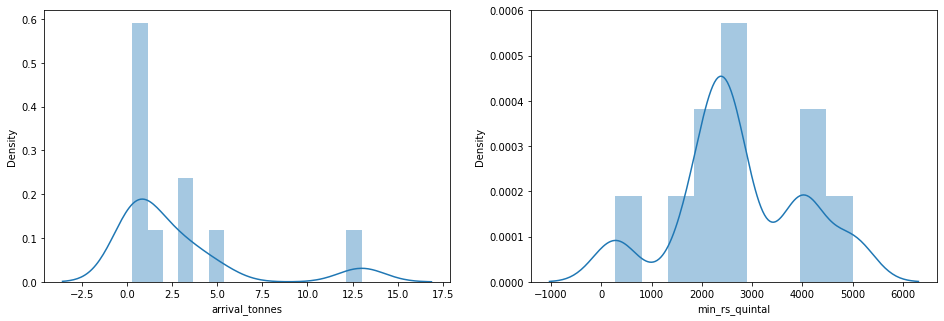

In [29]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df4['arrival_tonnes'])

plt.subplot(1,2,2)
sns.distplot(df4['min_rs_quintal'])

plt.show()

c:\users\paltu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.
c:\users\paltu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



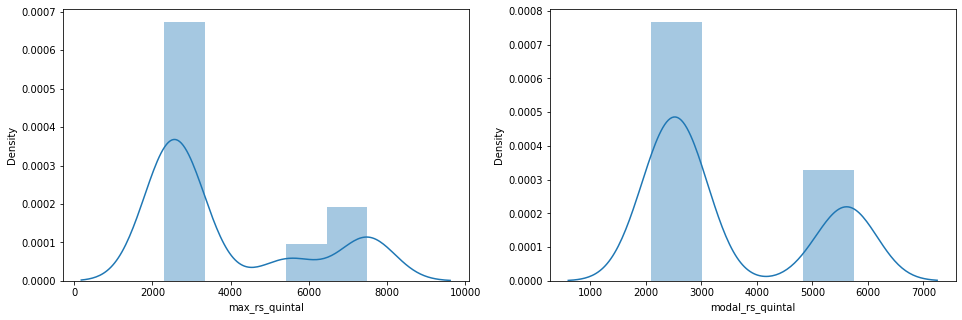

In [30]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(df4['max_rs_quintal'])

plt.subplot(1,2,2)
sns.distplot(df4['modal_rs_quintal'])

plt.show()

In [31]:
df4['arrival_tonnes'].skew()

2.0027409649255485

In [32]:
df4['min_rs_quintal'].skew()

-0.015356805547035734

In [33]:
df4['max_rs_quintal'].skew()

1.0216924407357

In [34]:
df4['modal_rs_quintal'].skew()

0.8190042970281383

<AxesSubplot:xlabel='modal_rs_quintal'>

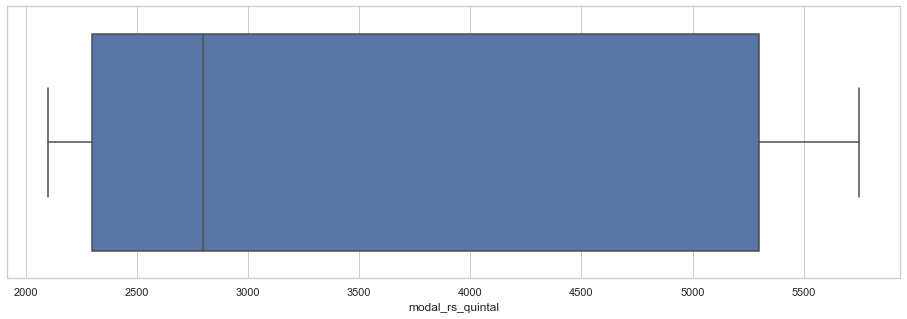

In [35]:
# seaborn.boxplot(x =tip['total_bill'])
plt.figure(figsize=(16,5))
sns.set(style="whitegrid")
sns.boxplot(x=df4['modal_rs_quintal'])

In [36]:
df4['min_rs_quintal'].value_counts()

4000    40
2300    40
2500    20
2400    20
1800    20
5000    20
2800    20
280     20
Name: min_rs_quintal, dtype: int64

In [37]:
dummies1=pd.get_dummies(df4.district)
dummies1.head(3)

,hyderabad - telangana - (southern),idukki - kerala - (southern western),kollam - kerala - (southern western),ranga reddy - telangana - (southern),sonipat - haryana - (northern),surat - gujarat - (western),wayanad - kerala - (southern western)
96,0,0,0,0,0,1,0
97,0,0,0,0,1,0,0
98,1,0,0,0,0,0,0


In [38]:
df4=pd.concat([df4,dummies1],axis='columns')
df4.head()

,district,arrival_tonnes,min_rs_quintal,max_rs_quintal,modal_rs_quintal,crop_name,day,month,hyderabad - telangana - (southern),idukki - kerala - (southern western),kollam - kerala - (southern western),ranga reddy - telangana - (southern),sonipat - haryana - (northern),surat - gujarat - (western),wayanad - kerala - (southern western)
96,surat - gujarat - (western),1.50,4000,7500,5750,arhar dal(tur dal),13,7,0,0,0,0,0,1,0
97,sonipat - haryana - (northern),0.45,2500,3000,2800,arhar dal(tur dal),13,7,0,0,0,0,1,0,0
98,hyderabad - telangana - (southern),3.00,2300,2300,2300,arhar dal(tur dal),13,7,1,0,0,0,0,0,0
99,ranga reddy - telangana - (southern),0.40,2300,2300,2300,arhar dal(tur dal),13,7,0,0,0,1,0,0,0
152,surat - gujarat - (western),1.50,4000,7500,5750,papaya,13,7,0,0,0,0,0,1,0


In [39]:
df5=df4.drop(['district','arrival_tonnes'],axis='columns')
df5.head(2)

,min_rs_quintal,max_rs_quintal,modal_rs_quintal,crop_name,day,month,hyderabad - telangana - (southern),idukki - kerala - (southern western),kollam - kerala - (southern western),ranga reddy - telangana - (southern),sonipat - haryana - (northern),surat - gujarat - (western),wayanad - kerala - (southern western)
96,4000,7500,5750,arhar dal(tur dal),13,7,0,0,0,0,0,1,0
97,2500,3000,2800,arhar dal(tur dal),13,7,0,0,0,0,1,0,0


In [40]:
df5['crop_name'].unique()

array(['arhar dal(tur dal)', 'papaya', 'rice', 'orange', 'banana',
       'black gram (urd beans)(whole)', 'jute', 'coconut', 'cotton',
       'maize', 'mango', 'pomegranate', 'grapes', 'apple',
       'karbuja(musk melon)', 'coffee', 'water melon', 'beans',
       'kabuli chana(chickpeas-white)', 'lentil (masur)(whole)'],
      dtype=object)

In [41]:
dummies2=pd.get_dummies(df4.crop_name)
dummies2.head(3)

,apple,arhar dal(tur dal),banana,beans,black gram (urd beans)(whole),coconut,coffee,cotton,grapes,jute,kabuli chana(chickpeas-white),karbuja(musk melon),lentil (masur)(whole),maize,mango,orange,papaya,pomegranate,rice,water melon
96,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
df6=pd.concat([df5,dummies2],axis='columns')
df6.head()

,min_rs_quintal,max_rs_quintal,modal_rs_quintal,crop_name,day,month,hyderabad - telangana - (southern),idukki - kerala - (southern western),kollam - kerala - (southern western),ranga reddy - telangana - (southern),...,kabuli chana(chickpeas-white),karbuja(musk melon),lentil (masur)(whole),maize,mango,orange,papaya,pomegranate,rice,water melon
96,4000,7500,5750,arhar dal(tur dal),13,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,2500,3000,2800,arhar dal(tur dal),13,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,2300,2300,2300,arhar dal(tur dal),13,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,2300,2300,2300,arhar dal(tur dal),13,7,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,4000,7500,5750,papaya,13,7,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
df7=df6.drop(['crop_name','min_rs_quintal','max_rs_quintal'],axis='columns')
df7.head(2)

,modal_rs_quintal,day,month,hyderabad - telangana - (southern),idukki - kerala - (southern western),kollam - kerala - (southern western),ranga reddy - telangana - (southern),sonipat - haryana - (northern),surat - gujarat - (western),wayanad - kerala - (southern western),...,kabuli chana(chickpeas-white),karbuja(musk melon),lentil (masur)(whole),maize,mango,orange,papaya,pomegranate,rice,water melon
96,5750,13,7,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
97,2800,13,7,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df7.columns

Index(['modal_rs_quintal', 'day', 'month',
       'hyderabad - telangana - (southern)',
       'idukki - kerala - (southern western)',
       'kollam - kerala - (southern western)',
       'ranga reddy - telangana - (southern)',
       'sonipat - haryana - (northern)', 'surat - gujarat - (western)',
       'wayanad - kerala - (southern western)', 'apple', 'arhar dal(tur dal)',
       'banana', 'beans', 'black gram (urd beans)(whole)', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kabuli chana(chickpeas-white)',
       'karbuja(musk melon)', 'lentil (masur)(whole)', 'maize', 'mango',
       'orange', 'papaya', 'pomegranate', 'rice', 'water melon'],
      dtype='object')

# label encoding process

In [45]:
X=df7.drop(['modal_rs_quintal'],axis='columns')

In [46]:
y=df7.modal_rs_quintal

In [47]:
y.head()

96     5750
97     2800
98     2300
99     2300
152    5750
Name: modal_rs_quintal, dtype: int64

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# split data into train and test sets
X_train, X_test, y_train_price, y_test_price =  train_test_split(X, y, test_size=0.2, random_state=42)

# train random forest classifier for diagnosis
rfc_price = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_price.fit(X_train, y_train_price)

RandomForestClassifier(random_state=42)

In [49]:
rfc_price.score(X_test,y_test_price)

1.0

In [50]:
rfc_price.predict(X_test)

array([5300, 2300, 2300, 5750, 5750, 2800, 2800, 5750, 2800, 2800, 2300,
       5750, 2500, 2300, 2800, 2500, 5750, 5750, 2100, 5750, 2100, 5750,
       2100, 2500, 2800, 5750, 2800, 2300, 5300, 2800, 2800, 2300, 2300,
       2300, 2800, 5750, 2500, 5300, 5750, 5750], dtype=int64)

In [51]:
y_test_price

1679    5300
283     2300
498     2300
2972    5750
2510    5750
1747    2800
1237    2800
3194    5750
3198    2800
921     2800
1082    2300
3218    5750
3129    2500
1342    2300
3222    2800
3213    2500
1024    5750
2966    5750
1492    2100
1236    5750
2326    2100
360     5750
2830    2100
1677    2500
1081    2800
1040    5750
1494    2800
1083    2300
2327    5300
2514    2800
193     2800
362     2300
991     2300
1243    2300
2832    2800
1736    5750
2547    2500
2549    5300
3128    5750
1340    5750
Name: modal_rs_quintal, dtype: int64

In [52]:
df7.columns

Index(['modal_rs_quintal', 'day', 'month',
       'hyderabad - telangana - (southern)',
       'idukki - kerala - (southern western)',
       'kollam - kerala - (southern western)',
       'ranga reddy - telangana - (southern)',
       'sonipat - haryana - (northern)', 'surat - gujarat - (western)',
       'wayanad - kerala - (southern western)', 'apple', 'arhar dal(tur dal)',
       'banana', 'beans', 'black gram (urd beans)(whole)', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kabuli chana(chickpeas-white)',
       'karbuja(musk melon)', 'lentil (masur)(whole)', 'maize', 'mango',
       'orange', 'papaya', 'pomegranate', 'rice', 'water melon'],
      dtype='object')

# dataset mein modal_price_per_quinntal hai idhar name short karne ke chakkar mein per haat gya tha

In [53]:
def predict_crop_price(region,crop_name,day,month):
    
    # Initialize x array with zeros of length equal to number of columns in X
    x = np.zeros(len(X.columns))
    
    # Find the index of Cardiac_CT and Previous_illnesses in the X.columns array
    loc_index1 = np.where(X.columns == region)[0][0]
    loc_index2 = np.where(X.columns == crop_name)[0][0]
    
    # Set the corresponding feature values in the x array
    x[0] = day
    x[1] = month
    
    # Set the values of the Cardiac_CT and Previous_illnesses features to 1
    if loc_index1>0:
        x[loc_index1]=1
    if loc_index2>0:
        x[loc_index2]=1
    
    # Use the trained random forest classifier model to predict the diagnosis
    modal_price = rfc_price.predict([x])[0]
    
    return modal_price

In [54]:
predict_crop_price('ranga reddy - telangana - (southern)','orange',5,7)

c:\users\paltu\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


2300

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [56]:
cm=confusion_matrix(y_test_price,rfc_price.predict(X_test))

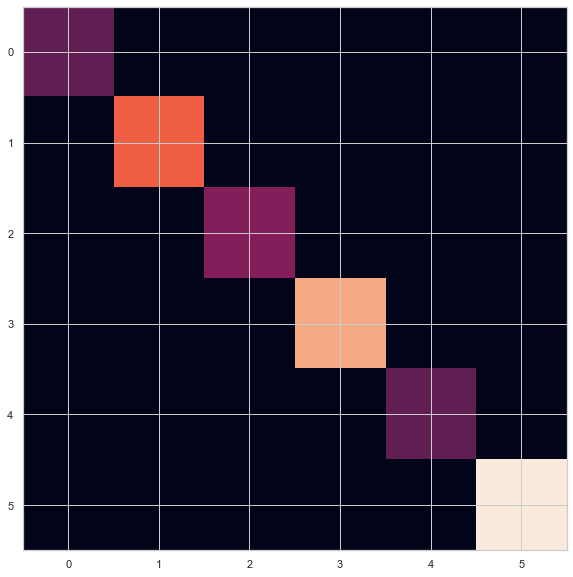

In [57]:
plt.imshow(cm)

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test_price, rfc_price.predict(X_test)))

              precision    recall  f1-score   support

        2100       1.00      1.00      1.00         3
        2300       1.00      1.00      1.00         8
        2500       1.00      1.00      1.00         4
        2800       1.00      1.00      1.00        10
        5300       1.00      1.00      1.00         3
        5750       1.00      1.00      1.00        12

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [60]:
from sklearn import metrics

In [62]:
Accuracy = metrics.accuracy_score(y_test_price,rfc_price.predict(X_test))
Accuracy

1.0

In [78]:
predict_crop_price('Kollam - Kerala - (Southern Western)','Orange',14,7)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [56]:
predict_crop_price('Sonipat - Haryana - (Northern)','Apple',14,7)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [57]:
predict_crop_price('Surat - Gujarat - (Western)','Banana',14,7)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [58]:
df7.columns

Index(['modal_rs_quintal', 'day', 'month',
       'hyderabad - telangana - (southern)',
       'idukki - kerala - (southern western)',
       'kollam - kerala - (southern western)',
       'ranga reddy - telangana - (southern)',
       'sonipat - haryana - (northern)', 'surat - gujarat - (western)',
       'wayanad - kerala - (southern western)', 'apple', 'arhar dal(tur dal)',
       'banana', 'beans', 'black gram (urd beans)(whole)', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kabuli chana(chickpeas-white)',
       'karbuja(musk melon)', 'lentil (masur)(whole)', 'maize', 'mango',
       'orange', 'papaya', 'pomegranate', 'rice', 'water melon'],
      dtype='object')

# saving the model here

In [80]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}

with open("columns_crops_price_new_1.json","w") as f:
    f.write(json.dumps(columns))

In [81]:
import pickle
with open('rfc_model_crops_price_new_1.pickle','wb') as f:
    pickle.dump(rfc_price,f)

In [61]:
df7.to_csv("new_agri.csv")

In [62]:
X_test.head()

,day,month,hyderabad - telangana - (southern),idukki - kerala - (southern western),kollam - kerala - (southern western),ranga reddy - telangana - (southern),sonipat - haryana - (northern),surat - gujarat - (western),wayanad - kerala - (southern western),apple,...,kabuli chana(chickpeas-white),karbuja(musk melon),lentil (masur)(whole),maize,mango,orange,papaya,pomegranate,rice,water melon
1679,14,7,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283,13,7,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
498,13,7,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2972,14,7,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2510,14,7,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [64]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9926075991912402

In [65]:
lr_clf.predict(X_test)

array([2406., 2796., 5564., 2703., 5575., 2404., 2705., 2396., 2795.,
       2394., 5934., 2406., 2417., 2097., 2100., 2418., 2715., 2386.,
       2509., 5308., 2113., 2098., 2810., 2485., 2745., 2703., 2098.,
       2796., 2445., 2099., 2497., 2405., 5574., 2703., 2406., 2097.,
       2716., 2704., 2436., 2704.])

In [66]:
y_test

1027    2300
153     2800
392     5750
3408    2800
988     5750
363     2300
2976    2800
991     2300
1237    2800
98      2300
1730    5750
194     2300
1243    2300
2770    2100
2326    2100
1043    2300
1741    2800
1342    2300
1743    2500
3221    5300
2968    2100
2512    2100
1041    2800
1539    2500
1734    2800
2095    2800
2548    2100
97      2800
923     2300
3196    2100
2973    2500
719     2300
1340    5750
1543    2800
603     2300
3214    2100
2329    2800
3133    2800
922     2300
3198    2800
Name: modal_rs_quintal, dtype: int64

In [73]:
def predict_crop_price2(region,crop_name,arrival_tonnes,day,month):
    
    # Initialize x array with zeros of length equal to number of columns in X
    x = np.zeros(len(X.columns))
    
    # Find the index of Cardiac_CT and Previous_illnesses in the X.columns array
    loc_index1 = np.where(X.columns == region)[0][0]
    loc_index2 = np.where(X.columns == crop_name)[0][0]
    
    # Set the corresponding feature values in the x array
    x[0] = day
    x[1] = month
    
    # Set the values of the Cardiac_CT and Previous_illnesses features to 1
    if loc_index1>0:
        x[loc_index1]=1
    if loc_index2>0:
        x[loc_index2]=1
    
    # Use the trained random forest classifier model to predict the diagnosis
    modal_price2 = round(lr_clf.predict([x])[0],2)
    
    return modal_price2

In [75]:
predict_crop_price2('idukki - kerala - (southern western)','apple',14,7)

TypeError: predict_crop_price2() missing 1 required positional argument: 'month'

In [88]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.99991562, 0.99982498, 0.9996096 , 0.99977717, 0.99971779])

In [89]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

c:\users\paltu\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
c:\users\paltu\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous beha

,model,best_score,best_params
0,linear_regression,0.999771,{'normalize': True}
1,lasso,0.995040,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,1.000000,"{'criterion': 'mse', 'splitter': 'best'}"


In [66]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion='entropy', splitter= 'best')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [71]:
model.predict(X_test)

array([2300, 2800, 5750, 2800, 5750, 2300, 2800, 2300, 2800, 2300, 5750,
       2300, 2300, 2100, 2100, 2300, 2800, 2300, 2500, 5300, 2100, 2100,
       2800, 2500, 2800, 2800, 2100, 2800, 2300, 2100, 2500, 2300, 5750,
       2800, 2300, 2100, 2800, 2800, 2300, 2800], dtype=int64)

In [72]:
y_test

1027    2300
153     2800
392     5750
3408    2800
988     5750
363     2300
2976    2800
991     2300
1237    2800
98      2300
1730    5750
194     2300
1243    2300
2770    2100
2326    2100
1043    2300
1741    2800
1342    2300
1743    2500
3221    5300
2968    2100
2512    2100
1041    2800
1539    2500
1734    2800
2095    2800
2548    2100
97      2800
923     2300
3196    2100
2973    2500
719     2300
1340    5750
1543    2800
603     2300
3214    2100
2329    2800
3133    2800
922     2300
3198    2800
Name: modal_rs_quintal, dtype: int64

In [73]:
def predict_crop_price3(region,crop_name,arrival_tonnes,day,month):
    
    # Initialize x array with zeros of length equal to number of columns in X
    x = np.zeros(len(X.columns))
    
    # Find the index of Cardiac_CT and Previous_illnesses in the X.columns array
    loc_index1 = np.where(X.columns == region)[0][0]
    loc_index2 = np.where(X.columns == crop_name)[0][0]
    
    # Set the corresponding feature values in the x array
    x[2] = arrival_tonnes
    x[3] = day
    x[4] = month
    
    # Set the values of the Cardiac_CT and Previous_illnesses features to 1
    if loc_index1>0:
        x[loc_index1]=1
    if loc_index2>0:
        x[loc_index2]=1
    
    # Use the trained random forest classifier model to predict the diagnosis
    modal_price = model.predict([x])[0]
    
    return modal_price

In [74]:
predict_crop_price('Ranga Reddy - Telangana - (Southern)','Orange',3,5,7)

c:\users\paltu\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


2300

In [78]:
predict_crop_price('Idukki - Kerala - (Southern Western)','Orange',3,5,7)

c:\users\paltu\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


2300

In [75]:
df7.columns

Index(['arrival_tonnes', 'modal_rs_quintal', 'day', 'month',
       'Hyderabad - Telangana - (Southern)',
       'Idukki - Kerala - (Southern Western)',
       'Kollam - Kerala - (Southern Western)',
       'Ranga Reddy - Telangana - (Southern)',
       'Sonipat - Haryana - (Northern)', 'Surat - Gujarat - (Western)',
       'Wayanad - Kerala - (Southern Western)', 'Apple', 'Arhar Dal(Tur Dal)',
       'Banana', 'Beans', 'Black Gram (Urd Beans)(Whole)', 'Coconut', 'Coffee',
       'Cotton', 'Grapes', 'Jute', 'Kabuli Chana(Chickpeas-White)',
       'Karbuja(Musk Melon)', 'Lentil (Masur)(Whole)', 'Maize', 'Mango',
       'Orange', 'Papaya', 'Pomegranate', 'Rice', 'Water Melon'],
      dtype='object')

In [65]:
y_test_price

1679    5300
283     2300
498     2300
2972    5750
2510    5750
1747    2800
1237    2800
3194    5750
3198    2800
921     2800
1082    2300
3218    5750
3129    2500
1342    2300
3222    2800
3213    2500
1024    5750
2966    5750
1492    2100
1236    5750
2326    2100
360     5750
2830    2100
1677    2500
1081    2800
1040    5750
1494    2800
1083    2300
2327    5300
2514    2800
193     2800
362     2300
991     2300
1243    2300
2832    2800
1736    5750
2547    2500
2549    5300
3128    5750
1340    5750
Name: modal_rs_quintal, dtype: int64

In [10]:
df2 = df1.loc[df1['district_name'].isin(['Ranga Reddy', 'Wayanad','Idukki', 'Kollam'])]

In [11]:
df2

,state_name,district_name,arrival_tonnes,min_price_rs_quintal,max_price_rs_quintal,modal_price_rs_quintal,reported_date,commodity_name
3,Telangana,Ranga Reddy,0.4,2300,2300,2300,2022-07-13,Ambada Seed
7,Telangana,Ranga Reddy,0.4,2300,2300,2300,2022-07-13,Wool
11,Telangana,Ranga Reddy,0.4,2300,2300,2300,2022-07-13,Pointed gourd (Parval)
15,Telangana,Ranga Reddy,0.4,2300,2300,2300,2022-07-13,Gladiolus Bulb
19,Telangana,Ranga Reddy,0.4,2300,2300,2300,2022-07-13,Thogrikai
...,...,...,...,...,...,...,...,...
3433,Telangana,Ranga Reddy,0.3,280,2800,2800,2022-07-14,Red Gram
3435,Kerala,Wayanad,13.0,2400,2500,2500,2022-07-14,Bamboo
3436,Kerala,Idukki,4.9,1800,2300,2100,2022-07-14,Bamboo
3437,Kerala,Kollam,0.3,5000,5500,5300,2022-07-14,Bamboo
